<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment08 Forward Propagation in the Neural Networks



## 1. Codes

### 1. Input Data

In [0]:
import numpy as np

file_data   = "/content/drive/My Drive/mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1


### 2. Average Image for Each Digit

take the arithmatic average of the image data with the same label for each digit

In [0]:
Average_image = np.zeros((size_row* size_col, 10), dtype=float)
Average_count = np.zeros(10, dtype=int)

for i in range(num_image):
  Average_image[:,list_label[i]] += list_image[:,i]
  Average_count[list_label[i]] +=1

for i in range(10):
  Average_image[:,i] = Average_image[:,i]//Average_count[i]

### 3. Forward Propagation with Random Weights

consider a neural network with a fully connected layer using a logistic unit
the weights of the fully connected layer are given by random numbers sampled from the Normal distribution N(0,1)\mathcal{N}(0, 1)N(0,1) with mean 0 and standard deviation 1
compute the average of the output of the neural network using a logistic unit for the images of the same label for each digit

In [0]:
mu = 0
sigma = 1
theta=  np.random.normal(mu, sigma, (1, 784)) # [1,784]  Normal distribution with mu=0, sigma=1

def sigmoid(x):
  return 1/(1+np.exp(-x))

def forward(x):                              #  [1, 784] x [784, 10000]
  r = np.dot(theta, x)
  return sigmoid(r)


In [0]:
average_activation = np.zeros(10, dtype=float)
list_activation = forward(test)

for i in range(num_image): # Summation of all activation for each label
  average_activation[list_label[i]] += list_activation[0,i]

for i in range(10):  # Average
  average_activation[i] /= Average_count[i]

## 2. Results

### 1. Plot the average image

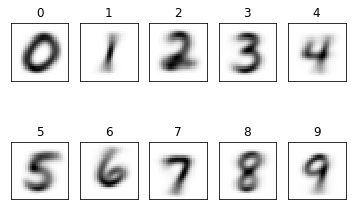

In [0]:
import matplotlib.pyplot as plt
#plot the average images of the same label for each digit
#arrange the subplots in 2x5 array for the 10 average images and present
# the label at the title of each subplot in the increasing order of the label

f1 = plt.figure(1)

for i in range(10):

    label       = i
    im_vector   = Average_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

### 2. Present the output of the neural network with random weights

In [34]:
for i in range(10):
  print(f"Label : {i}  output of the neural network {average_activation} ")

Label : 0  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 1  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 2  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 3  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 4  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 5  output of the neural network [0.27165339 0.94041493 0.5633886  0.72800009 0.70494956 0.71051665
 0.63422382 0.74140107 0.780196   0.83668216] 
Label : 6  output of the neural network [0.27165339 0.94041493 0.5633886  0.